## Mini_Project_01

### Dependency

In [3]:
# Machine Learning Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import minmax_scale, MinMaxScaler
from scipy.stats import shapiro, probplot
from scipy import stats

# Artificial Neural Network
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam, rmsprop

# Environmnets
import math
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

### Load data

In [4]:
sales = pd.read_csv('../data/sales_건강음료.csv', encoding='euc-kr')

### Preprocess

In [5]:
sales["YEAR"] = sales['YM'].astype('str').str[:4]
sales["MON"] = sales['YM'].astype('str').str[-2:]

In [6]:
sales

,YM,CATEGORY,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY,YEAR,MON
0,200901,건강음료,37,1410,1543,4,126753,151,12,2009,01
1,200902,건강음료,37,1209,1543,9,113399,3014,8,2009,02
2,200903,건강음료,38,1348,1547,12,129162,1383,9,2009,03
3,200904,건강음료,38,1377,1500,19,126277,3564,8,2009,04
4,200905,건강음료,40,1406,1528,25,129584,9288,12,2009,05
5,200906,건강음료,39,1343,1623,27,123218,9998,8,2009,06
6,200907,건강음료,38,1313,1600,28,131083,17405,8,2009,07
7,200908,건강음료,39,1448,1577,29,130040,7704,10,2009,08
8,200909,건강음료,41,1531,1559,27,131989,4096,8,2009,09
9,200910,건강음료,43,1670,1586,22,136095,2824,10,2009,10


In [60]:
corr = sales.corr(method = 'pearson')
corr

,YM,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
YM,1.000000,-0.387227,0.475358,0.845647,-0.021387,0.964160,0.195797,0.147752
ITEM_CNT,-0.387227,1.000000,-0.305669,-0.102890,0.087808,-0.388875,0.040712,-0.051467
QTY,0.475358,-0.305669,1.000000,0.352128,-0.258754,0.566744,-0.246630,0.138428
PRICE,0.845647,-0.102890,0.352128,1.000000,0.091919,0.874323,0.209682,0.106751
MAXTEMP,-0.021387,0.087808,-0.258754,0.091919,1.000000,0.026153,0.674853,-0.000733
SALEDAY,0.964160,-0.388875,0.566744,0.874323,0.026153,1.000000,0.213520,0.150917
RAIN_DAY,0.195797,0.040712,-0.246630,0.209682,0.674853,0.213520,1.000000,-0.051351
HOLIDAY,0.147752,-0.051467,0.138428,0.106751,-0.000733,0.150917,-0.051351,1.000000


#### Classfy Dataset with Year

In [23]:
s1 = sales[sales.YEAR=='2009']
s2 = sales[sales.YEAR=='2010']
s3 = sales[sales.YEAR=='2011']
s4 = sales[sales.YEAR=='2012']
s5 = sales[sales.YEAR=='2013']

In [24]:
s4.head()

,YM,CATEGORY,ITEM_CNT,QTY,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY,YEAR,MON
36,201201,건강음료,30,1701,2112,3,203133,362,11,2012,01
37,201202,건강음료,31,1607,2182,5,186880,377,8,2012,02
38,201203,건강음료,31,1578,2182,11,212945,6556,10,2012,03
39,201204,건강음료,42,1541,10944,18,209151,17042,9,2012,04
40,201205,건강음료,42,1662,10944,24,215673,2095,10,2012,05


#### Preview Dataset & Plot

- Time-series Plot

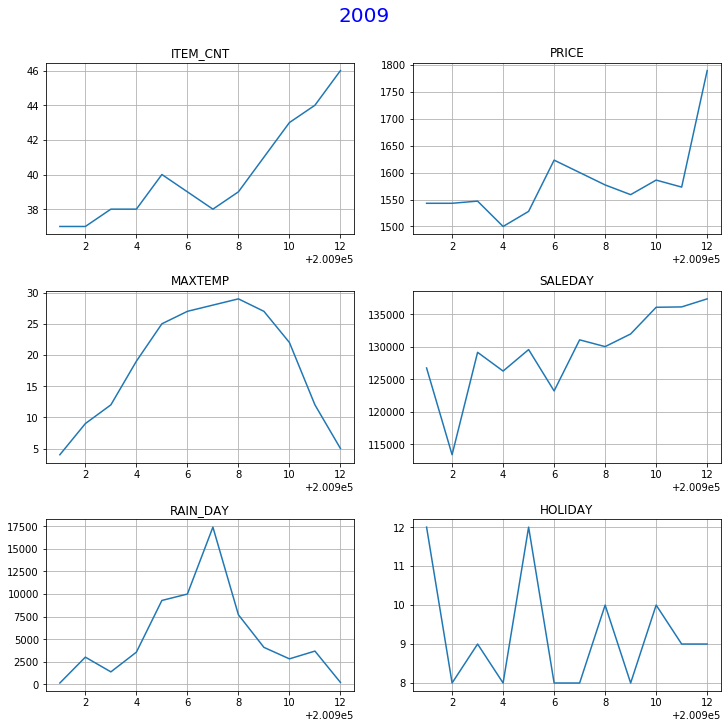

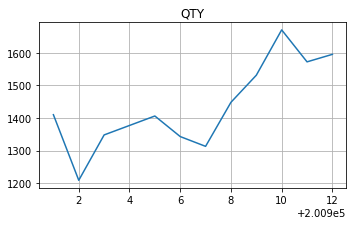

In [25]:
time_plot(s1)

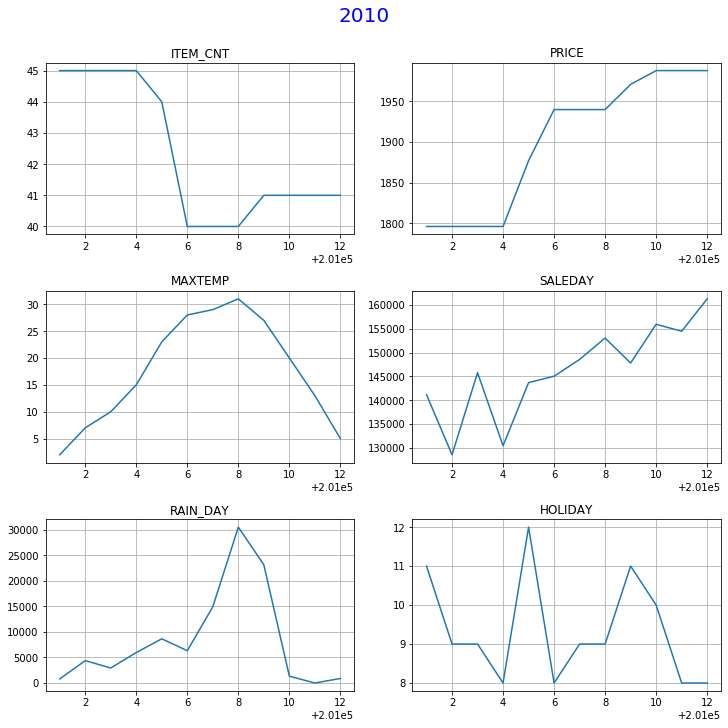

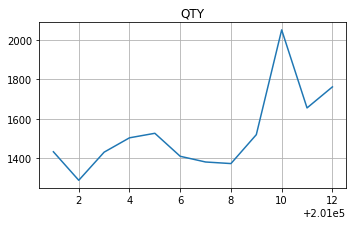

In [26]:
time_plot(s2)

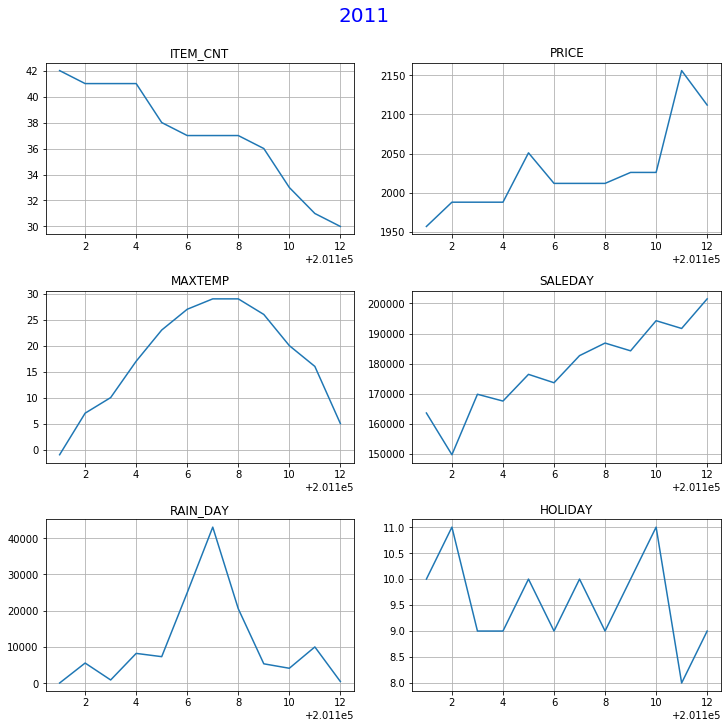

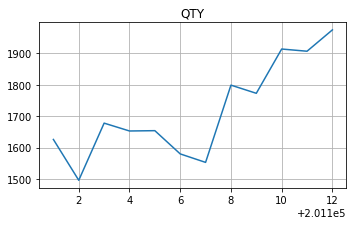

In [27]:
time_plot(s3)

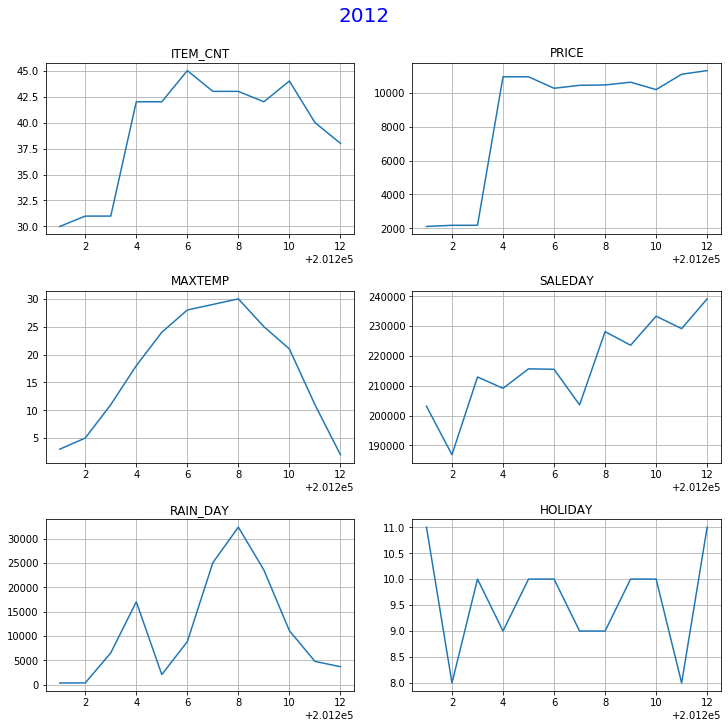

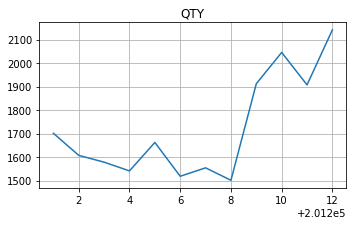

In [28]:
time_plot(s4)

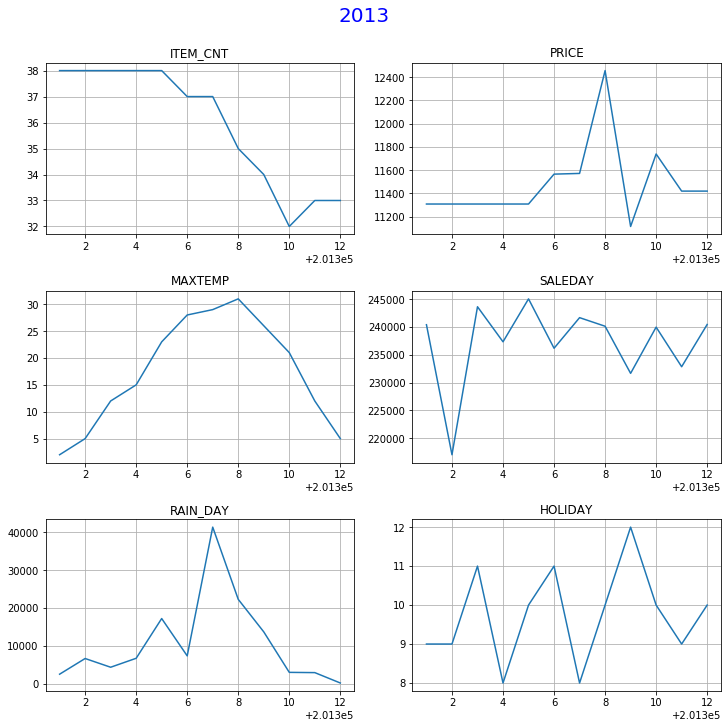

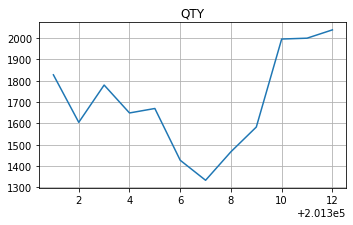

In [29]:
time_plot(s5)

- QTY Plot

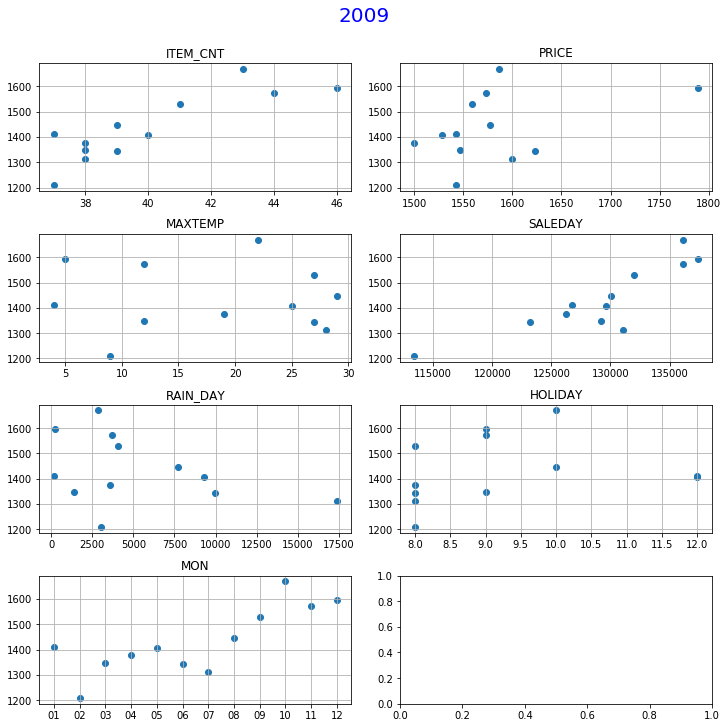

In [30]:
qty_plot(s1)

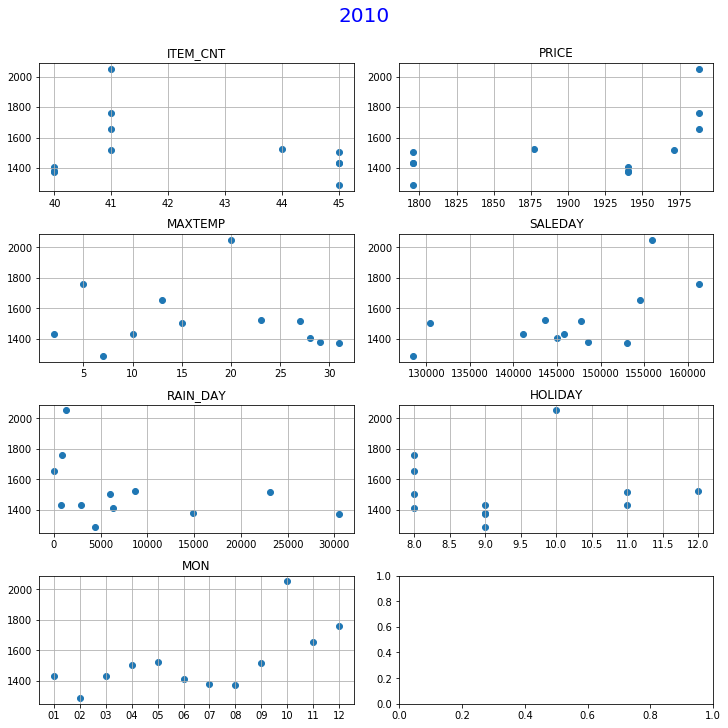

In [31]:
qty_plot(s2)

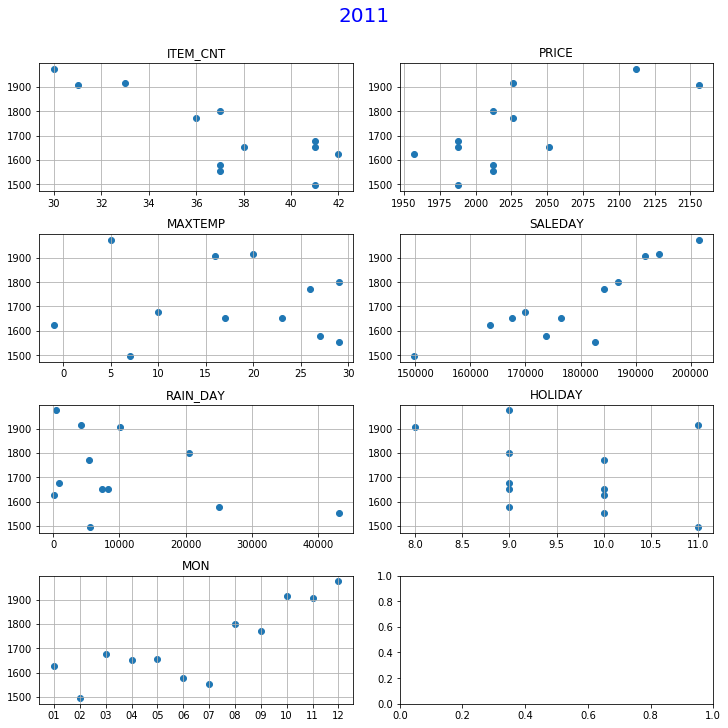

In [32]:
qty_plot(s3)

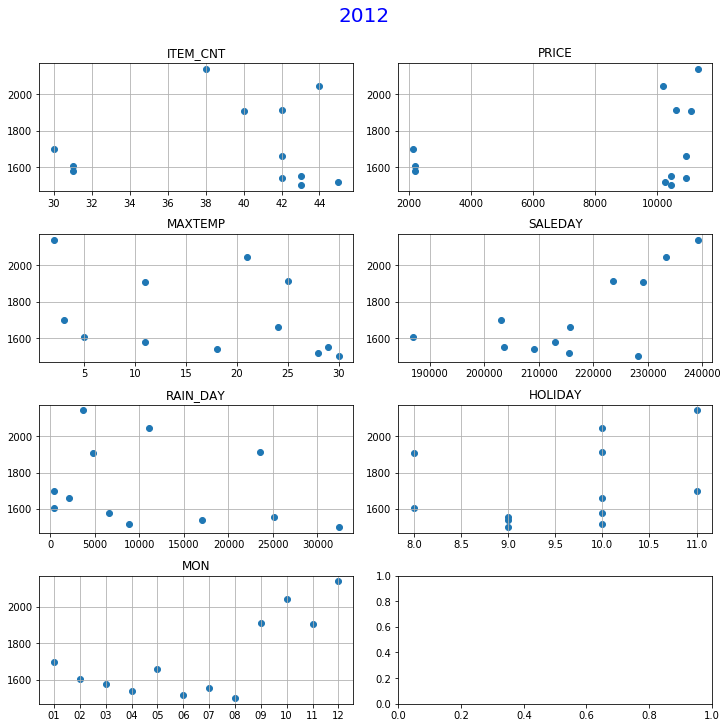

In [33]:
qty_plot(s4)

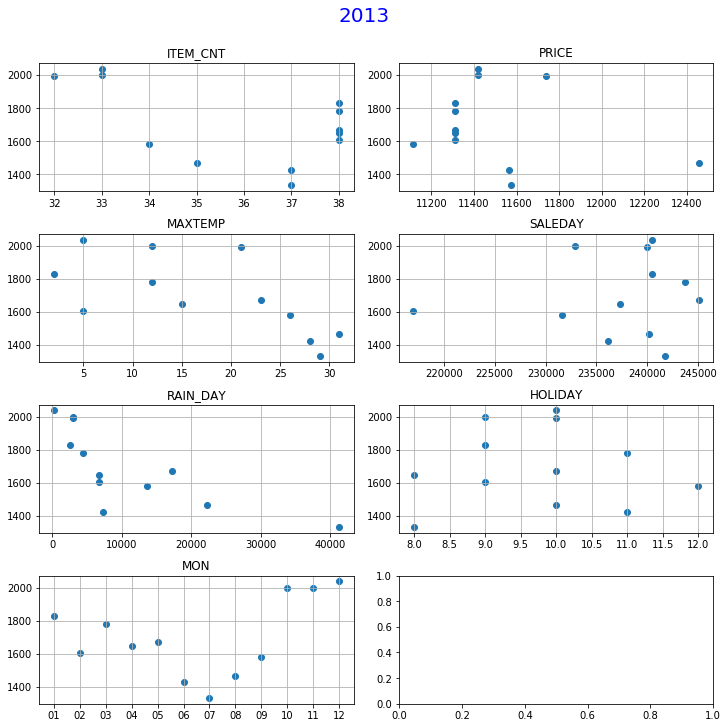

In [34]:
qty_plot(s5)

### Data Analysis

#### Normality Test

- Shapiro Test

In [36]:
weight, p_value = shapiro(sales.QTY)
print("[Weight: %.4f, P-value: %.4f]" % (weight, p_value))

[Weight: 0.9573, P-value: 0.0347]


- Plot

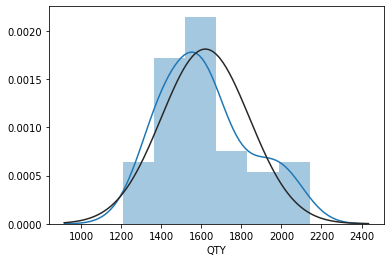

In [37]:
sns.distplot(sales.QTY, fit=stats.norm)
plt.show()

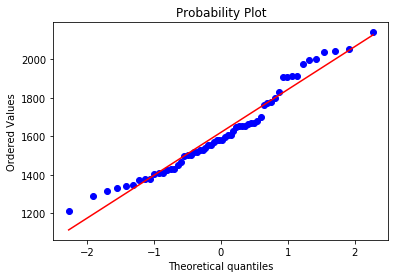

In [38]:
probplot(sales.QTY, plot=plt)
plt.show()

#### **Model 1**
 - Structure:  ITEM_CNT + PRICE + MAXTEMP + SALEDAY + RAIN_DAY + HOLIDAY = QTY

#### Divide Dataset into train and test

In [39]:
Y = sales['QTY']

In [40]:
X = sales.drop(['YM', 'QTY', 'CATEGORY', 'YEAR', 'MON'], axis=1)
X.head()

,ITEM_CNT,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY
0,37,1543,4,126753,151,12
1,37,1543,9,113399,3014,8
2,38,1547,12,129162,1383,9
3,38,1500,19,126277,3564,8
4,40,1528,25,129584,9288,12


In [41]:
X = np.array(X, dtype=np.float32)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=29)

In [43]:
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

#### Apply Regressions

In [44]:
model_type = ['lm', 'dt', 'svm', 'rf', 'ann']

regs1 = []
for m in model_type:
    regs1.append(apply_regs(x_train, y_train, x_test, y_test, model=m))

C:\Users\Jwp\Anaconda3\envs\py_ML\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Jwp\Anaconda3\envs\py_ML\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
W0829 20:57:05.539441 11432 deprecation_wrapper.py:119] From C:\Users\Jwp\Anaconda3\envs\py_ML\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0829 20:57:05.582629 11432 deprecation_wrapper.py:119] From C:\Users\Jwp\Anaconda3\envs\py_ML\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. P

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                448       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 7,233
Trainable params: 7,233
Non-trainable params: 0
_________________________________________________________________


W0829 20:57:06.018717 11432 deprecation_wrapper.py:119] From C:\Users\Jwp\Anaconda3\envs\py_ML\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0829 20:57:06.036453 11432 deprecation_wrapper.py:119] From C:\Users\Jwp\Anaconda3\envs\py_ML\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/2000
45/45 [==============================] - 0s 10ms/step - loss: 27565848.8444 - acc: 0.0000e+00
Epoch 2/2000
45/45 [==============================] - 0s 100us/step - loss: 14376474.9111 - acc: 0.0000e+00
Epoch 3/2000
45/45 [==============================] - 0s 134us/step - loss: 9202474.3111 - acc: 0.0000e+00
Epoch 4/2000
45/45 [==============================] - 0s 149us/step - loss: 5943023.9333 - acc: 0.0000e+00
Epoch 5/2000
45/45 [==============================] - 0s 108us/step - loss: 3653839.3222 - acc: 0.0000e+00
Epoch 6/2000
45/45 [==============================] - 0s 106us/step - loss: 2259915.7444 - acc: 0.0000e+00
Epoch 7/2000
45/45 [==============================] - 0s 118us/step - loss: 1402297.3250 - acc: 0.0000e+00
Epoch 8/2000
45/45 [==============================] - 0s 110us/step - loss: 873153.6903 - acc: 0.0000e+00
Epoch 9/2000
45/45 [==============================] - 0s 144us/step - loss: 557318.6868 - acc: 0.0000e+00
Epoch 10/2000
45/45 [=================

45/45 [==============================] - 0s 148us/step - loss: 95227.5465 - acc: 0.0000e+00
Epoch 78/2000
45/45 [==============================] - 0s 130us/step - loss: 101235.7911 - acc: 0.0000e+00
Epoch 79/2000
45/45 [==============================] - 0s 89us/step - loss: 115692.9299 - acc: 0.0000e+00
Epoch 80/2000
45/45 [==============================] - 0s 147us/step - loss: 129994.4965 - acc: 0.0000e+00
Epoch 81/2000
45/45 [==============================] - 0s 136us/step - loss: 152649.4889 - acc: 0.0000e+00
Epoch 82/2000
45/45 [==============================] - 0s 135us/step - loss: 122937.8552 - acc: 0.0000e+00
Epoch 83/2000
45/45 [==============================] - 0s 144us/step - loss: 92970.1844 - acc: 0.0000e+00
Epoch 84/2000
45/45 [==============================] - 0s 120us/step - loss: 160702.7937 - acc: 0.0000e+00
Epoch 85/2000
45/45 [==============================] - 0s 126us/step - loss: 130885.0167 - acc: 0.0000e+00
Epoch 86/2000
45/45 [==============================] -

45/45 [==============================] - 0s 132us/step - loss: 95920.3358 - acc: 0.0000e+00
Epoch 154/2000
45/45 [==============================] - 0s 147us/step - loss: 64477.8526 - acc: 0.0000e+00
Epoch 155/2000
45/45 [==============================] - 0s 111us/step - loss: 73488.5983 - acc: 0.0000e+00
Epoch 156/2000
45/45 [==============================] - 0s 121us/step - loss: 102139.0800 - acc: 0.0000e+00
Epoch 157/2000
45/45 [==============================] - 0s 119us/step - loss: 64257.1416 - acc: 0.0000e+00
Epoch 158/2000
45/45 [==============================] - 0s 138us/step - loss: 63269.8724 - acc: 0.0000e+00
Epoch 159/2000
45/45 [==============================] - 0s 144us/step - loss: 65800.8953 - acc: 0.0000e+00
Epoch 160/2000
45/45 [==============================] - 0s 121us/step - loss: 65554.8168 - acc: 0.0000e+00
Epoch 161/2000
45/45 [==============================] - 0s 139us/step - loss: 167732.7226 - acc: 0.0222
Epoch 162/2000
45/45 [==============================] 

45/45 [==============================] - 0s 105us/step - loss: 52159.0753 - acc: 0.0000e+00
Epoch 231/2000
45/45 [==============================] - 0s 133us/step - loss: 49699.2856 - acc: 0.0000e+00
Epoch 232/2000
45/45 [==============================] - 0s 98us/step - loss: 60847.3530 - acc: 0.0000e+00
Epoch 233/2000
45/45 [==============================] - 0s 133us/step - loss: 88233.1165 - acc: 0.0000e+00
Epoch 234/2000
45/45 [==============================] - 0s 104us/step - loss: 66046.9839 - acc: 0.0000e+00
Epoch 235/2000
45/45 [==============================] - 0s 138us/step - loss: 77603.8769 - acc: 0.0222
Epoch 236/2000
45/45 [==============================] - 0s 136us/step - loss: 66155.1727 - acc: 0.0000e+00
Epoch 237/2000
45/45 [==============================] - 0s 153us/step - loss: 60230.2993 - acc: 0.0000e+00
Epoch 238/2000
45/45 [==============================] - 0s 161us/step - loss: 46631.3725 - acc: 0.0000e+00
Epoch 239/2000
45/45 [==============================] - 0

Epoch 307/2000
45/45 [==============================] - 0s 124us/step - loss: 98750.4868 - acc: 0.0000e+00
Epoch 308/2000
45/45 [==============================] - 0s 138us/step - loss: 64162.1185 - acc: 0.0000e+00
Epoch 309/2000
45/45 [==============================] - 0s 85us/step - loss: 43747.6111 - acc: 0.0222
Epoch 310/2000
45/45 [==============================] - 0s 157us/step - loss: 44092.1721 - acc: 0.0000e+00
Epoch 311/2000
45/45 [==============================] - 0s 165us/step - loss: 95943.7542 - acc: 0.0000e+00
Epoch 312/2000
45/45 [==============================] - 0s 136us/step - loss: 77661.7950 - acc: 0.0000e+00
Epoch 313/2000
45/45 [==============================] - 0s 186us/step - loss: 73383.3219 - acc: 0.0000e+00
Epoch 314/2000
45/45 [==============================] - 0s 183us/step - loss: 57058.5364 - acc: 0.0000e+00
Epoch 315/2000
45/45 [==============================] - 0s 170us/step - loss: 38324.9267 - acc: 0.0000e+00
Epoch 316/2000
45/45 [====================

45/45 [==============================] - 0s 78us/step - loss: 77976.2448 - acc: 0.0000e+00
Epoch 385/2000
45/45 [==============================] - 0s 205us/step - loss: 62491.1672 - acc: 0.0000e+00
Epoch 386/2000
45/45 [==============================] - 0s 139us/step - loss: 51168.6281 - acc: 0.0000e+00
Epoch 387/2000
45/45 [==============================] - 0s 92us/step - loss: 34697.2792 - acc: 0.0000e+00
Epoch 388/2000
45/45 [==============================] - 0s 134us/step - loss: 42849.1386 - acc: 0.0000e+00
Epoch 389/2000
45/45 [==============================] - 0s 123us/step - loss: 74129.1500 - acc: 0.0000e+00
Epoch 390/2000
45/45 [==============================] - 0s 118us/step - loss: 86906.9306 - acc: 0.0000e+00
Epoch 391/2000
45/45 [==============================] - 0s 108us/step - loss: 43818.9672 - acc: 0.0222
Epoch 392/2000
45/45 [==============================] - 0s 75us/step - loss: 53083.1724 - acc: 0.0000e+00
Epoch 393/2000
45/45 [==============================] - 0s 

45/45 [==============================] - 0s 165us/step - loss: 108065.2285 - acc: 0.0000e+00
Epoch 462/2000
45/45 [==============================] - 0s 179us/step - loss: 52493.8611 - acc: 0.0000e+00
Epoch 463/2000
45/45 [==============================] - 0s 107us/step - loss: 32294.4914 - acc: 0.0000e+00
Epoch 464/2000
45/45 [==============================] - 0s 128us/step - loss: 43111.3688 - acc: 0.0000e+00
Epoch 465/2000
45/45 [==============================] - 0s 94us/step - loss: 31406.5914 - acc: 0.0000e+00
Epoch 466/2000
45/45 [==============================] - 0s 107us/step - loss: 31948.0477 - acc: 0.0000e+00
Epoch 467/2000
45/45 [==============================] - 0s 76us/step - loss: 31749.2982 - acc: 0.0000e+00
Epoch 468/2000
45/45 [==============================] - 0s 110us/step - loss: 32443.1765 - acc: 0.0000e+00
Epoch 469/2000
45/45 [==============================] - 0s 141us/step - loss: 96812.9118 - acc: 0.0000e+00
Epoch 470/2000
45/45 [==============================]

45/45 [==============================] - 0s 102us/step - loss: 29967.6041 - acc: 0.0000e+00
Epoch 539/2000
45/45 [==============================] - 0s 276us/step - loss: 118988.0434 - acc: 0.0000e+00
Epoch 540/2000
45/45 [==============================] - 0s 139us/step - loss: 64726.4679 - acc: 0.0000e+00
Epoch 541/2000
45/45 [==============================] - 0s 171us/step - loss: 30330.1579 - acc: 0.0222
Epoch 542/2000
45/45 [==============================] - 0s 92us/step - loss: 36696.8345 - acc: 0.0222
Epoch 543/2000
45/45 [==============================] - 0s 107us/step - loss: 34488.5149 - acc: 0.0000e+00
Epoch 544/2000
45/45 [==============================] - 0s 135us/step - loss: 29719.9945 - acc: 0.0000e+00
Epoch 545/2000
45/45 [==============================] - 0s 123us/step - loss: 36828.7020 - acc: 0.0000e+00
Epoch 546/2000
45/45 [==============================] - 0s 85us/step - loss: 33503.3980 - acc: 0.0000e+00
Epoch 547/2000
45/45 [==============================] - 0s 98

45/45 [==============================] - 0s 129us/step - loss: 103695.9095 - acc: 0.0000e+00
Epoch 616/2000
45/45 [==============================] - 0s 209us/step - loss: 40240.7124 - acc: 0.0000e+00
Epoch 617/2000
45/45 [==============================] - 0s 168us/step - loss: 31676.8527 - acc: 0.0000e+00
Epoch 618/2000
45/45 [==============================] - 0s 120us/step - loss: 42266.1875 - acc: 0.0000e+00
Epoch 619/2000
45/45 [==============================] - 0s 151us/step - loss: 28668.8174 - acc: 0.0222
Epoch 620/2000
45/45 [==============================] - 0s 153us/step - loss: 28720.4528 - acc: 0.0000e+00
Epoch 621/2000
45/45 [==============================] - 0s 141us/step - loss: 30279.5294 - acc: 0.0000e+00
Epoch 622/2000
45/45 [==============================] - 0s 147us/step - loss: 96608.3042 - acc: 0.0000e+00
Epoch 623/2000
45/45 [==============================] - 0s 180us/step - loss: 80582.9755 - acc: 0.0000e+00
Epoch 624/2000
45/45 [==============================] -

45/45 [==============================] - 0s 131us/step - loss: 36156.9786 - acc: 0.0000e+00
Epoch 693/2000
45/45 [==============================] - 0s 152us/step - loss: 28259.3822 - acc: 0.0000e+00
Epoch 694/2000
45/45 [==============================] - 0s 179us/step - loss: 27906.7852 - acc: 0.0000e+00
Epoch 695/2000
45/45 [==============================] - 0s 111us/step - loss: 29777.5419 - acc: 0.0000e+00
Epoch 696/2000
45/45 [==============================] - 0s 186us/step - loss: 71410.3174 - acc: 0.0222
Epoch 697/2000
45/45 [==============================] - 0s 75us/step - loss: 91117.1916 - acc: 0.0000e+00
Epoch 698/2000
45/45 [==============================] - 0s 172us/step - loss: 44086.0872 - acc: 0.0000e+00
Epoch 699/2000
45/45 [==============================] - 0s 142us/step - loss: 58026.5979 - acc: 0.0000e+00
Epoch 700/2000
45/45 [==============================] - 0s 168us/step - loss: 33442.3618 - acc: 0.0000e+00
Epoch 701/2000
45/45 [==============================] - 0

45/45 [==============================] - 0s 144us/step - loss: 56553.0939 - acc: 0.0000e+00
Epoch 770/2000
45/45 [==============================] - 0s 78us/step - loss: 43549.0516 - acc: 0.0000e+00
Epoch 771/2000
45/45 [==============================] - 0s 240us/step - loss: 28984.3707 - acc: 0.0000e+00
Epoch 772/2000
45/45 [==============================] - 0s 176us/step - loss: 27314.9405 - acc: 0.0000e+00
Epoch 773/2000
45/45 [==============================] - 0s 68us/step - loss: 27290.4890 - acc: 0.0000e+00
Epoch 774/2000
45/45 [==============================] - 0s 154us/step - loss: 27498.8549 - acc: 0.0000e+00
Epoch 775/2000
45/45 [==============================] - 0s 166us/step - loss: 35362.2286 - acc: 0.0000e+00
Epoch 776/2000
45/45 [==============================] - 0s 109us/step - loss: 97948.4517 - acc: 0.0000e+00
Epoch 777/2000
45/45 [==============================] - 0s 161us/step - loss: 117132.1751 - acc: 0.0000e+00
Epoch 778/2000
45/45 [==============================]

45/45 [==============================] - 0s 140us/step - loss: 55299.2453 - acc: 0.0000e+00
Epoch 847/2000
45/45 [==============================] - 0s 87us/step - loss: 29070.7770 - acc: 0.0000e+00
Epoch 848/2000
45/45 [==============================] - 0s 96us/step - loss: 55206.6121 - acc: 0.0000e+00
Epoch 849/2000
45/45 [==============================] - 0s 218us/step - loss: 49113.0002 - acc: 0.0000e+00
Epoch 850/2000
45/45 [==============================] - 0s 79us/step - loss: 28953.3976 - acc: 0.0000e+00
Epoch 851/2000
45/45 [==============================] - 0s 115us/step - loss: 35132.0895 - acc: 0.0000e+00
Epoch 852/2000
45/45 [==============================] - 0s 93us/step - loss: 51048.5337 - acc: 0.0000e+00
Epoch 853/2000
45/45 [==============================] - 0s 154us/step - loss: 66592.7068 - acc: 0.0000e+00
Epoch 854/2000
45/45 [==============================] - 0s 169us/step - loss: 32954.3524 - acc: 0.0000e+00
Epoch 855/2000
45/45 [==============================] - 

45/45 [==============================] - 0s 112us/step - loss: 28620.2363 - acc: 0.0000e+00
Epoch 923/2000
45/45 [==============================] - 0s 74us/step - loss: 35365.3163 - acc: 0.0000e+00
Epoch 924/2000
45/45 [==============================] - 0s 100us/step - loss: 75913.0481 - acc: 0.0000e+00
Epoch 925/2000
45/45 [==============================] - 0s 91us/step - loss: 57337.8642 - acc: 0.0000e+00
Epoch 926/2000
45/45 [==============================] - 0s 70us/step - loss: 28104.4363 - acc: 0.0222
Epoch 927/2000
45/45 [==============================] - 0s 79us/step - loss: 32800.3569 - acc: 0.0000e+00
Epoch 928/2000
45/45 [==============================] - 0s 75us/step - loss: 56522.9087 - acc: 0.0000e+00
Epoch 929/2000
45/45 [==============================] - 0s 90us/step - loss: 47517.5180 - acc: 0.0000e+00
Epoch 930/2000
45/45 [==============================] - 0s 76us/step - loss: 38080.0461 - acc: 0.0000e+00
Epoch 931/2000
45/45 [==============================] - 0s 122u

45/45 [==============================] - 0s 137us/step - loss: 28965.4019 - acc: 0.0000e+00
Epoch 1000/2000
45/45 [==============================] - 0s 175us/step - loss: 26896.8890 - acc: 0.0000e+00
Epoch 1001/2000
45/45 [==============================] - 0s 157us/step - loss: 42470.5986 - acc: 0.0000e+00
Epoch 1002/2000
45/45 [==============================] - 0s 162us/step - loss: 36019.3350 - acc: 0.0000e+00
Epoch 1003/2000
45/45 [==============================] - 0s 169us/step - loss: 51864.7148 - acc: 0.0000e+00
Epoch 1004/2000
45/45 [==============================] - 0s 138us/step - loss: 72589.4425 - acc: 0.0000e+00
Epoch 1005/2000
45/45 [==============================] - 0s 168us/step - loss: 52707.6796 - acc: 0.0000e+00
Epoch 1006/2000
45/45 [==============================] - 0s 116us/step - loss: 30103.7849 - acc: 0.0000e+00
Epoch 1007/2000
45/45 [==============================] - 0s 118us/step - loss: 39970.1334 - acc: 0.0000e+00
Epoch 1008/2000
45/45 [=====================

45/45 [==============================] - 0s 98us/step - loss: 66742.0283 - acc: 0.0000e+00
Epoch 1076/2000
45/45 [==============================] - 0s 114us/step - loss: 35158.5480 - acc: 0.0000e+00
Epoch 1077/2000
45/45 [==============================] - 0s 102us/step - loss: 31099.7911 - acc: 0.0000e+00
Epoch 1078/2000
45/45 [==============================] - 0s 68us/step - loss: 55357.5250 - acc: 0.0000e+00
Epoch 1079/2000
45/45 [==============================] - 0s 124us/step - loss: 40199.9293 - acc: 0.0000e+00
Epoch 1080/2000
45/45 [==============================] - 0s 104us/step - loss: 44845.1891 - acc: 0.0000e+00
Epoch 1081/2000
45/45 [==============================] - 0s 55us/step - loss: 27701.8549 - acc: 0.0000e+00
Epoch 1082/2000
45/45 [==============================] - 0s 107us/step - loss: 27287.7099 - acc: 0.0000e+00
Epoch 1083/2000
45/45 [==============================] - 0s 86us/step - loss: 27381.6775 - acc: 0.0000e+00
Epoch 1084/2000
45/45 [=========================

45/45 [==============================] - 0s 81us/step - loss: 26378.9739 - acc: 0.0000e+00
Epoch 1152/2000
45/45 [==============================] - 0s 108us/step - loss: 38988.7471 - acc: 0.0222
Epoch 1153/2000
45/45 [==============================] - 0s 84us/step - loss: 37540.1505 - acc: 0.0000e+00
Epoch 1154/2000
45/45 [==============================] - 0s 92us/step - loss: 27413.6518 - acc: 0.0000e+00
Epoch 1155/2000
45/45 [==============================] - 0s 69us/step - loss: 40103.4585 - acc: 0.0000e+00
Epoch 1156/2000
45/45 [==============================] - 0s 140us/step - loss: 55193.6616 - acc: 0.0000e+00
Epoch 1157/2000
45/45 [==============================] - 0s 178us/step - loss: 71835.0345 - acc: 0.0000e+00
Epoch 1158/2000
45/45 [==============================] - 0s 139us/step - loss: 36319.5112 - acc: 0.0000e+00
Epoch 1159/2000
45/45 [==============================] - 0s 130us/step - loss: 32115.9697 - acc: 0.0000e+00
Epoch 1160/2000
45/45 [=============================

45/45 [==============================] - 0s 89us/step - loss: 27056.3943 - acc: 0.0000e+00
Epoch 1228/2000
45/45 [==============================] - 0s 91us/step - loss: 51863.6181 - acc: 0.0000e+00
Epoch 1229/2000
45/45 [==============================] - 0s 93us/step - loss: 32209.8018 - acc: 0.0222
Epoch 1230/2000
45/45 [==============================] - 0s 108us/step - loss: 26773.6141 - acc: 0.0000e+00
Epoch 1231/2000
45/45 [==============================] - 0s 71us/step - loss: 26622.2086 - acc: 0.0000e+00
Epoch 1232/2000
45/45 [==============================] - 0s 119us/step - loss: 33975.7266 - acc: 0.0000e+00
Epoch 1233/2000
45/45 [==============================] - 0s 117us/step - loss: 50482.3329 - acc: 0.0000e+00
Epoch 1234/2000
45/45 [==============================] - 0s 91us/step - loss: 56265.4287 - acc: 0.0000e+00
Epoch 1235/2000
45/45 [==============================] - 0s 89us/step - loss: 29696.8217 - acc: 0.0000e+00
Epoch 1236/2000
45/45 [==============================]

45/45 [==============================] - 0s 148us/step - loss: 27912.2348 - acc: 0.0000e+00
Epoch 1304/2000
45/45 [==============================] - 0s 72us/step - loss: 26332.7820 - acc: 0.0000e+00
Epoch 1305/2000
45/45 [==============================] - 0s 102us/step - loss: 65361.1795 - acc: 0.0000e+00
Epoch 1306/2000
45/45 [==============================] - 0s 95us/step - loss: 46699.3864 - acc: 0.0000e+00
Epoch 1307/2000
45/45 [==============================] - 0s 99us/step - loss: 27298.6192 - acc: 0.0000e+00
Epoch 1308/2000
45/45 [==============================] - 0s 102us/step - loss: 35279.4999 - acc: 0.0000e+00
Epoch 1309/2000
45/45 [==============================] - 0s 75us/step - loss: 27583.3770 - acc: 0.0000e+00
Epoch 1310/2000
45/45 [==============================] - 0s 91us/step - loss: 28630.1805 - acc: 0.0000e+00
Epoch 1311/2000
45/45 [==============================] - 0s 94us/step - loss: 27203.6801 - acc: 0.0000e+00
Epoch 1312/2000
45/45 [===========================

45/45 [==============================] - 0s 104us/step - loss: 32809.6849 - acc: 0.0000e+00
Epoch 1380/2000
45/45 [==============================] - 0s 152us/step - loss: 38345.0208 - acc: 0.0222
Epoch 1381/2000
45/45 [==============================] - 0s 165us/step - loss: 38683.0474 - acc: 0.0000e+00
Epoch 1382/2000
45/45 [==============================] - 0s 127us/step - loss: 49770.7905 - acc: 0.0222
Epoch 1383/2000
45/45 [==============================] - 0s 138us/step - loss: 67568.5705 - acc: 0.0000e+00
Epoch 1384/2000
45/45 [==============================] - 0s 128us/step - loss: 28495.1359 - acc: 0.0000e+00
Epoch 1385/2000
45/45 [==============================] - 0s 97us/step - loss: 29311.6230 - acc: 0.0000e+00
Epoch 1386/2000
45/45 [==============================] - 0s 209us/step - loss: 34636.8444 - acc: 0.0000e+00
Epoch 1387/2000
45/45 [==============================] - 0s 154us/step - loss: 29483.4332 - acc: 0.0000e+00
Epoch 1388/2000
45/45 [==============================

45/45 [==============================] - 0s 85us/step - loss: 32434.9236 - acc: 0.0000e+00
Epoch 1456/2000
45/45 [==============================] - 0s 93us/step - loss: 28423.7747 - acc: 0.0222
Epoch 1457/2000
45/45 [==============================] - 0s 88us/step - loss: 28873.4489 - acc: 0.0000e+00
Epoch 1458/2000
45/45 [==============================] - 0s 98us/step - loss: 31124.6461 - acc: 0.0222
Epoch 1459/2000
45/45 [==============================] - 0s 111us/step - loss: 75937.9780 - acc: 0.0000e+00
Epoch 1460/2000
45/45 [==============================] - 0s 121us/step - loss: 65918.1601 - acc: 0.0000e+00
Epoch 1461/2000
45/45 [==============================] - 0s 86us/step - loss: 27191.0326 - acc: 0.0000e+00
Epoch 1462/2000
45/45 [==============================] - 0s 110us/step - loss: 28086.9068 - acc: 0.0000e+00
Epoch 1463/2000
45/45 [==============================] - 0s 75us/step - loss: 33610.2055 - acc: 0.0000e+00
Epoch 1464/2000
45/45 [==============================] - 0

45/45 [==============================] - 0s 101us/step - loss: 56595.4888 - acc: 0.0000e+00
Epoch 1532/2000
45/45 [==============================] - 0s 154us/step - loss: 37370.6308 - acc: 0.0000e+00
Epoch 1533/2000
45/45 [==============================] - 0s 143us/step - loss: 26529.4839 - acc: 0.0000e+00
Epoch 1534/2000
45/45 [==============================] - 0s 163us/step - loss: 27556.0556 - acc: 0.0000e+00
Epoch 1535/2000
45/45 [==============================] - 0s 115us/step - loss: 57687.2454 - acc: 0.0222
Epoch 1536/2000
45/45 [==============================] - 0s 145us/step - loss: 51852.2887 - acc: 0.0222
Epoch 1537/2000
45/45 [==============================] - 0s 115us/step - loss: 28063.7086 - acc: 0.0000e+00
Epoch 1538/2000
45/45 [==============================] - 0s 155us/step - loss: 44688.7221 - acc: 0.0000e+00
Epoch 1539/2000
45/45 [==============================] - 0s 154us/step - loss: 49200.0115 - acc: 0.0000e+00
Epoch 1540/2000
45/45 [=============================

45/45 [==============================] - 0s 97us/step - loss: 27444.1634 - acc: 0.0222
Epoch 1608/2000
45/45 [==============================] - 0s 139us/step - loss: 30177.9593 - acc: 0.0000e+00
Epoch 1609/2000
45/45 [==============================] - 0s 133us/step - loss: 28224.3159 - acc: 0.0222
Epoch 1610/2000
45/45 [==============================] - 0s 177us/step - loss: 77765.2203 - acc: 0.0000e+00
Epoch 1611/2000
45/45 [==============================] - 0s 134us/step - loss: 37840.5510 - acc: 0.0000e+00
Epoch 1612/2000
45/45 [==============================] - 0s 91us/step - loss: 36520.9748 - acc: 0.0000e+00
Epoch 1613/2000
45/45 [==============================] - 0s 97us/step - loss: 30117.0766 - acc: 0.0000e+00
Epoch 1614/2000
45/45 [==============================] - 0s 125us/step - loss: 42642.9268 - acc: 0.0000e+00
Epoch 1615/2000
45/45 [==============================] - 0s 140us/step - loss: 45667.6443 - acc: 0.0000e+00
Epoch 1616/2000
45/45 [==============================] 

45/45 [==============================] - 0s 90us/step - loss: 34710.0810 - acc: 0.0000e+00
Epoch 1684/2000
45/45 [==============================] - 0s 102us/step - loss: 33545.0699 - acc: 0.0000e+00
Epoch 1685/2000
45/45 [==============================] - 0s 114us/step - loss: 47665.6237 - acc: 0.0000e+00
Epoch 1686/2000
45/45 [==============================] - 0s 119us/step - loss: 42599.7790 - acc: 0.0000e+00
Epoch 1687/2000
45/45 [==============================] - 0s 94us/step - loss: 28280.9970 - acc: 0.0000e+00
Epoch 1688/2000
45/45 [==============================] - 0s 84us/step - loss: 32236.5164 - acc: 0.0000e+00
Epoch 1689/2000
45/45 [==============================] - 0s 139us/step - loss: 26614.1799 - acc: 0.0000e+00
Epoch 1690/2000
45/45 [==============================] - 0s 86us/step - loss: 30157.5181 - acc: 0.0000e+00
Epoch 1691/2000
45/45 [==============================] - 0s 81us/step - loss: 55697.2510 - acc: 0.0000e+00
Epoch 1692/2000
45/45 [==========================

45/45 [==============================] - 0s 126us/step - loss: 26299.8363 - acc: 0.0000e+00
Epoch 1760/2000
45/45 [==============================] - 0s 163us/step - loss: 26837.2373 - acc: 0.0000e+00
Epoch 1761/2000
45/45 [==============================] - 0s 164us/step - loss: 46879.7688 - acc: 0.0000e+00
Epoch 1762/2000
45/45 [==============================] - 0s 132us/step - loss: 28745.9349 - acc: 0.0000e+00
Epoch 1763/2000
45/45 [==============================] - 0s 148us/step - loss: 31053.2869 - acc: 0.0000e+00
Epoch 1764/2000
45/45 [==============================] - 0s 170us/step - loss: 39242.5022 - acc: 0.0000e+00
Epoch 1765/2000
45/45 [==============================] - 0s 155us/step - loss: 30382.4161 - acc: 0.0000e+00
Epoch 1766/2000
45/45 [==============================] - 0s 142us/step - loss: 32581.4707 - acc: 0.0000e+00
Epoch 1767/2000
45/45 [==============================] - 0s 129us/step - loss: 26557.4738 - acc: 0.0000e+00
Epoch 1768/2000
45/45 [=====================

45/45 [==============================] - 0s 101us/step - loss: 28603.5319 - acc: 0.0000e+00
Epoch 1836/2000
45/45 [==============================] - 0s 89us/step - loss: 27758.2327 - acc: 0.0000e+00
Epoch 1837/2000
45/45 [==============================] - 0s 121us/step - loss: 33167.4699 - acc: 0.0000e+00
Epoch 1838/2000
45/45 [==============================] - 0s 113us/step - loss: 33194.8383 - acc: 0.0222
Epoch 1839/2000
45/45 [==============================] - 0s 108us/step - loss: 26919.3493 - acc: 0.0222
Epoch 1840/2000
45/45 [==============================] - 0s 85us/step - loss: 36371.4894 - acc: 0.0000e+00
Epoch 1841/2000
45/45 [==============================] - 0s 129us/step - loss: 26468.5947 - acc: 0.0222
Epoch 1842/2000
45/45 [==============================] - 0s 131us/step - loss: 27645.3962 - acc: 0.0000e+00
Epoch 1843/2000
45/45 [==============================] - 0s 117us/step - loss: 26887.4571 - acc: 0.0000e+00
Epoch 1844/2000
45/45 [==============================] - 0

45/45 [==============================] - 0s 105us/step - loss: 33848.5625 - acc: 0.0000e+00
Epoch 1912/2000
45/45 [==============================] - 0s 124us/step - loss: 53683.3001 - acc: 0.0000e+00
Epoch 1913/2000
45/45 [==============================] - 0s 172us/step - loss: 36584.2498 - acc: 0.0000e+00
Epoch 1914/2000
45/45 [==============================] - 0s 144us/step - loss: 27320.1114 - acc: 0.0000e+00
Epoch 1915/2000
45/45 [==============================] - 0s 146us/step - loss: 30402.5116 - acc: 0.0000e+00
Epoch 1916/2000
45/45 [==============================] - 0s 136us/step - loss: 31400.3419 - acc: 0.0000e+00
Epoch 1917/2000
45/45 [==============================] - 0s 139us/step - loss: 40609.0223 - acc: 0.0000e+00
Epoch 1918/2000
45/45 [==============================] - 0s 197us/step - loss: 46570.7379 - acc: 0.0000e+00
Epoch 1919/2000
45/45 [==============================] - 0s 131us/step - loss: 26349.7371 - acc: 0.0000e+00
Epoch 1920/2000
45/45 [=====================

45/45 [==============================] - 0s 105us/step - loss: 27733.1020 - acc: 0.0000e+00
Epoch 1988/2000
45/45 [==============================] - 0s 155us/step - loss: 38107.8759 - acc: 0.0000e+00
Epoch 1989/2000
45/45 [==============================] - 0s 152us/step - loss: 36961.3177 - acc: 0.0000e+00
Epoch 1990/2000
45/45 [==============================] - 0s 167us/step - loss: 30662.8593 - acc: 0.0000e+00
Epoch 1991/2000
45/45 [==============================] - 0s 140us/step - loss: 28844.7076 - acc: 0.0000e+00
Epoch 1992/2000
45/45 [==============================] - 0s 167us/step - loss: 44503.6404 - acc: 0.0000e+00
Epoch 1993/2000
45/45 [==============================] - 0s 182us/step - loss: 49890.3136 - acc: 0.0000e+00
Epoch 1994/2000
45/45 [==============================] - 0s 191us/step - loss: 53644.8527 - acc: 0.0000e+00
Epoch 1995/2000
45/45 [==============================] - 0s 164us/step - loss: 39983.9226 - acc: 0.0000e+00
Epoch 1996/2000
45/45 [=====================

In [68]:
regs1[0][1].intercept_

105.81836

In [69]:
regs1[0][1].coef_

array([ 8.046484  , -0.04301136,  1.110008  ,  0.00812165, -0.00840525,
        1.6154722 ], dtype=float32)

In [ ]:
import statsmod

#### Model Evaluation

In [54]:
for reg in regs1:
    print(f"[ Model: {reg[0]:25} | RMSE: {reg[3]:.4f} ]")

[ Model: LinearRegression          | RMSE: 143.4645 ]
[ Model: DecisionTreeRegressor     | RMSE: 225.7754 ]
[ Model: SVC                       | RMSE: 573.4046 ]
[ Model: RandomForestRegressor     | RMSE: 144.9571 ]
[ Model: ArtificialNeuralNetwork   | RMSE: 218.8746 ]


In [55]:
table1 = view_table(regs1)
table1

,Regression,RMSE
1,LinearRegression,143.46
2,DecisionTreeRegressor,225.78
3,SVC,573.40
4,RandomForestRegressor,144.96
5,ArtificialNeuralNetwork,218.87


#### **Model 2**
 - Structure:  ITEM_CNT + PRICE + MAXTEMP + SALEDAY + RAIN_DAY + HOLIDAY + **MON** = QTY

In [56]:
X = sales.drop(['YM', 'QTY', 'CATEGORY', 'YEAR'], axis=1)
X.head()

,ITEM_CNT,PRICE,MAXTEMP,SALEDAY,RAIN_DAY,HOLIDAY,MON
0,37,1543,4,126753,151,12,01
1,37,1543,9,113399,3014,8,02
2,38,1547,12,129162,1383,9,03
3,38,1500,19,126277,3564,8,04
4,40,1528,25,129584,9288,12,05


In [57]:
X = np.array(X, dtype=np.float32)

In [58]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=29)

In [59]:
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

In [51]:
model_type = ['lm', 'dt', 'svm', 'rf', 'ann']

regs2 = []
for m in model_type:
    regs2.append(apply_regs(x_train, y_train, x_test, y_test, model=m))

C:\Users\Jwp\Anaconda3\envs\py_ML\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Jwp\Anaconda3\envs\py_ML\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 17        
Total params: 7,297
Trainable params: 7,297
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
45/45 [==============================] - 0s 9ms/step - loss: 258923473.4222 - acc: 0.0000e+00
Epoch 2/2000
45/45 [=============

45/45 [==============================] - 0s 88us/step - loss: 60063.1600 - acc: 0.0000e+00
Epoch 69/2000
45/45 [==============================] - 0s 92us/step - loss: 52181.9247 - acc: 0.0000e+00
Epoch 70/2000
45/45 [==============================] - 0s 76us/step - loss: 71018.2297 - acc: 0.0000e+00
Epoch 71/2000
45/45 [==============================] - 0s 96us/step - loss: 55899.9271 - acc: 0.0000e+00
Epoch 72/2000
45/45 [==============================] - 0s 96us/step - loss: 97965.9073 - acc: 0.0000e+00
Epoch 73/2000
45/45 [==============================] - 0s 76us/step - loss: 112464.6496 - acc: 0.0000e+00
Epoch 74/2000
45/45 [==============================] - 0s 59us/step - loss: 38308.5319 - acc: 0.0000e+00
Epoch 75/2000
45/45 [==============================] - 0s 181us/step - loss: 33188.5768 - acc: 0.0000e+00
Epoch 76/2000
45/45 [==============================] - 0s 116us/step - loss: 43673.9052 - acc: 0.0000e+00
Epoch 77/2000
45/45 [==============================] - 0s 133us/st

45/45 [==============================] - 0s 159us/step - loss: 37261.8006 - acc: 0.0000e+00
Epoch 146/2000
45/45 [==============================] - 0s 167us/step - loss: 36278.5623 - acc: 0.0000e+00
Epoch 147/2000
45/45 [==============================] - 0s 172us/step - loss: 40916.1504 - acc: 0.0000e+00
Epoch 148/2000
45/45 [==============================] - 0s 140us/step - loss: 75865.7446 - acc: 0.0000e+00
Epoch 149/2000
45/45 [==============================] - 0s 130us/step - loss: 96320.3389 - acc: 0.0000e+00
Epoch 150/2000
45/45 [==============================] - 0s 101us/step - loss: 62689.0582 - acc: 0.0000e+00
Epoch 151/2000
45/45 [==============================] - 0s 155us/step - loss: 55012.5246 - acc: 0.0000e+00
Epoch 152/2000
45/45 [==============================] - 0s 88us/step - loss: 49878.0507 - acc: 0.0000e+00
Epoch 153/2000
45/45 [==============================] - 0s 153us/step - loss: 43272.5913 - acc: 0.0000e+00
Epoch 154/2000
45/45 [==============================]

45/45 [==============================] - 0s 101us/step - loss: 35273.3904 - acc: 0.0000e+00
Epoch 222/2000
45/45 [==============================] - 0s 57us/step - loss: 30468.2668 - acc: 0.0000e+00
Epoch 223/2000
45/45 [==============================] - 0s 102us/step - loss: 41546.7260 - acc: 0.0000e+00
Epoch 224/2000
45/45 [==============================] - 0s 95us/step - loss: 79733.6899 - acc: 0.0000e+00
Epoch 225/2000
45/45 [==============================] - 0s 80us/step - loss: 72297.2120 - acc: 0.0000e+00
Epoch 226/2000
45/45 [==============================] - 0s 91us/step - loss: 31192.6626 - acc: 0.0000e+00
Epoch 227/2000
45/45 [==============================] - 0s 81us/step - loss: 55848.4722 - acc: 0.0000e+00
Epoch 228/2000
45/45 [==============================] - 0s 96us/step - loss: 103531.5306 - acc: 0.0000e+00
Epoch 229/2000
45/45 [==============================] - 0s 133us/step - loss: 42602.1116 - acc: 0.0222
Epoch 230/2000
45/45 [==============================] - 0s 14

45/45 [==============================] - 0s 124us/step - loss: 30865.1737 - acc: 0.0000e+00
Epoch 299/2000
45/45 [==============================] - 0s 93us/step - loss: 60029.9828 - acc: 0.0000e+00
Epoch 300/2000
45/45 [==============================] - 0s 104us/step - loss: 107866.4852 - acc: 0.0000e+00
Epoch 301/2000
45/45 [==============================] - 0s 100us/step - loss: 57179.1213 - acc: 0.0000e+00
Epoch 302/2000
45/45 [==============================] - 0s 69us/step - loss: 34351.7202 - acc: 0.0000e+00
Epoch 303/2000
45/45 [==============================] - 0s 50us/step - loss: 43577.3267 - acc: 0.0000e+00
Epoch 304/2000
45/45 [==============================] - 0s 66us/step - loss: 50405.4359 - acc: 0.0000e+00
Epoch 305/2000
45/45 [==============================] - 0s 92us/step - loss: 66070.9926 - acc: 0.0000e+00
Epoch 306/2000
45/45 [==============================] - 0s 77us/step - loss: 66213.8458 - acc: 0.0000e+00
Epoch 307/2000
45/45 [==============================] - 0

Epoch 375/2000
45/45 [==============================] - 0s 196us/step - loss: 27924.9554 - acc: 0.0000e+00
Epoch 376/2000
45/45 [==============================] - 0s 154us/step - loss: 43658.8664 - acc: 0.0000e+00
Epoch 377/2000
45/45 [==============================] - 0s 199us/step - loss: 77181.8438 - acc: 0.0000e+00
Epoch 378/2000
45/45 [==============================] - 0s 157us/step - loss: 84535.4708 - acc: 0.0000e+00
Epoch 379/2000
45/45 [==============================] - 0s 150us/step - loss: 28523.2869 - acc: 0.0000e+00
Epoch 380/2000
45/45 [==============================] - 0s 157us/step - loss: 29500.7445 - acc: 0.0000e+00
Epoch 381/2000
45/45 [==============================] - 0s 197us/step - loss: 50084.5277 - acc: 0.0000e+00
Epoch 382/2000
45/45 [==============================] - 0s 105us/step - loss: 40752.4555 - acc: 0.0000e+00
Epoch 383/2000
45/45 [==============================] - 0s 159us/step - loss: 38535.4426 - acc: 0.0000e+00
Epoch 384/2000
45/45 [===============

Epoch 452/2000
45/45 [==============================] - 0s 153us/step - loss: 88699.3862 - acc: 0.0000e+00
Epoch 453/2000
45/45 [==============================] - 0s 140us/step - loss: 31515.9260 - acc: 0.0000e+00
Epoch 454/2000
45/45 [==============================] - 0s 158us/step - loss: 27490.0268 - acc: 0.0222
Epoch 455/2000
45/45 [==============================] - 0s 237us/step - loss: 27690.1797 - acc: 0.0000e+00
Epoch 456/2000
45/45 [==============================] - 0s 175us/step - loss: 70742.0686 - acc: 0.0222
Epoch 457/2000
45/45 [==============================] - 0s 186us/step - loss: 138578.1625 - acc: 0.0000e+00
Epoch 458/2000
45/45 [==============================] - 0s 128us/step - loss: 37202.9069 - acc: 0.0000e+00
Epoch 459/2000
45/45 [==============================] - 0s 67us/step - loss: 28660.8552 - acc: 0.0000e+00
Epoch 460/2000
45/45 [==============================] - 0s 150us/step - loss: 27526.8317 - acc: 0.0000e+00
Epoch 461/2000
45/45 [=======================

45/45 [==============================] - 0s 109us/step - loss: 159385.7097 - acc: 0.0000e+00
Epoch 529/2000
45/45 [==============================] - 0s 81us/step - loss: 109236.8112 - acc: 0.0000e+00
Epoch 530/2000
45/45 [==============================] - 0s 121us/step - loss: 27163.7917 - acc: 0.0000e+00
Epoch 531/2000
45/45 [==============================] - 0s 89us/step - loss: 29629.9714 - acc: 0.0000e+00
Epoch 532/2000
45/45 [==============================] - 0s 124us/step - loss: 44155.3564 - acc: 0.0000e+00
Epoch 533/2000
45/45 [==============================] - 0s 152us/step - loss: 38470.7250 - acc: 0.0000e+00
Epoch 534/2000
45/45 [==============================] - 0s 153us/step - loss: 29922.9699 - acc: 0.0000e+00
Epoch 535/2000
45/45 [==============================] - 0s 166us/step - loss: 44357.1929 - acc: 0.0000e+00
Epoch 536/2000
45/45 [==============================] - 0s 137us/step - loss: 31974.7706 - acc: 0.0000e+00
Epoch 537/2000
45/45 [==============================

Epoch 605/2000
45/45 [==============================] - 0s 120us/step - loss: 49460.2636 - acc: 0.0000e+00
Epoch 606/2000
45/45 [==============================] - 0s 90us/step - loss: 53102.4412 - acc: 0.0000e+00
Epoch 607/2000
45/45 [==============================] - 0s 81us/step - loss: 59755.7437 - acc: 0.0000e+00
Epoch 608/2000
45/45 [==============================] - 0s 150us/step - loss: 31653.0575 - acc: 0.0000e+00
Epoch 609/2000
45/45 [==============================] - 0s 57us/step - loss: 33038.2341 - acc: 0.0000e+00
Epoch 610/2000
45/45 [==============================] - 0s 174us/step - loss: 29450.4089 - acc: 0.0000e+00
Epoch 611/2000
45/45 [==============================] - 0s 136us/step - loss: 59302.8047 - acc: 0.0000e+00
Epoch 612/2000
45/45 [==============================] - 0s 168us/step - loss: 97506.1585 - acc: 0.0000e+00
Epoch 613/2000
45/45 [==============================] - 0s 171us/step - loss: 38307.2467 - acc: 0.0000e+00
Epoch 614/2000
45/45 [==================

Epoch 682/2000
45/45 [==============================] - 0s 99us/step - loss: 73451.8115 - acc: 0.0000e+00
Epoch 683/2000
45/45 [==============================] - 0s 135us/step - loss: 102745.9241 - acc: 0.0000e+00
Epoch 684/2000
45/45 [==============================] - 0s 126us/step - loss: 32524.7811 - acc: 0.0000e+00
Epoch 685/2000
45/45 [==============================] - 0s 112us/step - loss: 26996.5750 - acc: 0.0222
Epoch 686/2000
45/45 [==============================] - 0s 95us/step - loss: 32167.3435 - acc: 0.0000e+00
Epoch 687/2000
45/45 [==============================] - 0s 119us/step - loss: 62852.1214 - acc: 0.0000e+00
Epoch 688/2000
45/45 [==============================] - 0s 128us/step - loss: 90075.1684 - acc: 0.0000e+00
Epoch 689/2000
45/45 [==============================] - 0s 124us/step - loss: 30240.8761 - acc: 0.0000e+00
Epoch 690/2000
45/45 [==============================] - 0s 124us/step - loss: 31977.8803 - acc: 0.0000e+00
Epoch 691/2000
45/45 [====================

45/45 [==============================] - 0s 111us/step - loss: 127108.4116 - acc: 0.0000e+00
Epoch 760/2000
45/45 [==============================] - 0s 117us/step - loss: 47394.9764 - acc: 0.0000e+00
Epoch 761/2000
45/45 [==============================] - 0s 57us/step - loss: 37525.8860 - acc: 0.0000e+00
Epoch 762/2000
45/45 [==============================] - 0s 131us/step - loss: 46936.5264 - acc: 0.0000e+00
Epoch 763/2000
45/45 [==============================] - 0s 151us/step - loss: 32250.7239 - acc: 0.0000e+00
Epoch 764/2000
45/45 [==============================] - 0s 128us/step - loss: 41289.2080 - acc: 0.0000e+00
Epoch 765/2000
45/45 [==============================] - 0s 158us/step - loss: 55681.7445 - acc: 0.0000e+00
Epoch 766/2000
45/45 [==============================] - 0s 86us/step - loss: 27353.7377 - acc: 0.0000e+00
Epoch 767/2000
45/45 [==============================] - 0s 123us/step - loss: 27952.0470 - acc: 0.0000e+00
Epoch 768/2000
45/45 [==============================]

45/45 [==============================] - 0s 139us/step - loss: 26163.0034 - acc: 0.0000e+00
Epoch 836/2000
45/45 [==============================] - 0s 128us/step - loss: 30825.3959 - acc: 0.0000e+00
Epoch 837/2000
45/45 [==============================] - 0s 112us/step - loss: 33541.6342 - acc: 0.0000e+00
Epoch 838/2000
45/45 [==============================] - 0s 115us/step - loss: 49216.1965 - acc: 0.0000e+00
Epoch 839/2000
45/45 [==============================] - 0s 98us/step - loss: 117319.9550 - acc: 0.0000e+00
Epoch 840/2000
45/45 [==============================] - 0s 123us/step - loss: 60112.6740 - acc: 0.0000e+00
Epoch 841/2000
45/45 [==============================] - 0s 136us/step - loss: 48967.1088 - acc: 0.0000e+00
Epoch 842/2000
45/45 [==============================] - 0s 132us/step - loss: 53069.6407 - acc: 0.0000e+00
Epoch 843/2000
45/45 [==============================] - 0s 110us/step - loss: 31950.5434 - acc: 0.0000e+00
Epoch 844/2000
45/45 [==============================

45/45 [==============================] - 0s 118us/step - loss: 56705.8620 - acc: 0.0000e+00
Epoch 913/2000
45/45 [==============================] - 0s 114us/step - loss: 26778.7388 - acc: 0.0000e+00
Epoch 914/2000
45/45 [==============================] - 0s 143us/step - loss: 25788.6659 - acc: 0.0000e+00
Epoch 915/2000
45/45 [==============================] - 0s 80us/step - loss: 41709.9637 - acc: 0.0222
Epoch 916/2000
45/45 [==============================] - 0s 147us/step - loss: 40939.5247 - acc: 0.0000e+00
Epoch 917/2000
45/45 [==============================] - 0s 127us/step - loss: 37826.4518 - acc: 0.0000e+00
Epoch 918/2000
45/45 [==============================] - 0s 121us/step - loss: 42903.9629 - acc: 0.0000e+00
Epoch 919/2000
45/45 [==============================] - 0s 145us/step - loss: 25276.5839 - acc: 0.0000e+00
Epoch 920/2000
45/45 [==============================] - 0s 107us/step - loss: 43351.0252 - acc: 0.0000e+00
Epoch 921/2000
45/45 [==============================] - 0

Epoch 989/2000
45/45 [==============================] - 0s 116us/step - loss: 49054.8153 - acc: 0.0000e+00
Epoch 990/2000
45/45 [==============================] - 0s 146us/step - loss: 40704.2485 - acc: 0.0000e+00
Epoch 991/2000
45/45 [==============================] - 0s 187us/step - loss: 63373.3877 - acc: 0.0000e+00
Epoch 992/2000
45/45 [==============================] - 0s 117us/step - loss: 25652.1144 - acc: 0.0000e+00
Epoch 993/2000
45/45 [==============================] - 0s 154us/step - loss: 45740.4175 - acc: 0.0000e+00
Epoch 994/2000
45/45 [==============================] - 0s 120us/step - loss: 88490.8177 - acc: 0.0000e+00
Epoch 995/2000
45/45 [==============================] - 0s 142us/step - loss: 28459.8244 - acc: 0.0222
Epoch 996/2000
45/45 [==============================] - 0s 118us/step - loss: 39986.0431 - acc: 0.0000e+00
Epoch 997/2000
45/45 [==============================] - 0s 146us/step - loss: 33275.6633 - acc: 0.0000e+00
Epoch 998/2000
45/45 [===================

45/45 [==============================] - 0s 87us/step - loss: 53624.2924 - acc: 0.0222
Epoch 1066/2000
45/45 [==============================] - 0s 159us/step - loss: 26026.7680 - acc: 0.0000e+00
Epoch 1067/2000
45/45 [==============================] - 0s 100us/step - loss: 26181.8861 - acc: 0.0000e+00
Epoch 1068/2000
45/45 [==============================] - ETA: 0s - loss: 27615.5664 - acc: 0.0000e+0 - 0s 78us/step - loss: 27660.5530 - acc: 0.0000e+00
Epoch 1069/2000
45/45 [==============================] - 0s 71us/step - loss: 30113.9594 - acc: 0.0000e+00
Epoch 1070/2000
45/45 [==============================] - 0s 102us/step - loss: 79930.5042 - acc: 0.0000e+00
Epoch 1071/2000
45/45 [==============================] - 0s 92us/step - loss: 62833.6027 - acc: 0.0000e+00
Epoch 1072/2000
45/45 [==============================] - 0s 114us/step - loss: 31290.7119 - acc: 0.0000e+00
Epoch 1073/2000
45/45 [==============================] - 0s 134us/step - loss: 27791.7086 - acc: 0.0000e+00
Epoch 

45/45 [==============================] - 0s 139us/step - loss: 32728.3596 - acc: 0.0222
Epoch 1141/2000
45/45 [==============================] - 0s 181us/step - loss: 35864.9582 - acc: 0.0000e+00
Epoch 1142/2000
45/45 [==============================] - 0s 177us/step - loss: 57113.3753 - acc: 0.0000e+00
Epoch 1143/2000
45/45 [==============================] - 0s 164us/step - loss: 50429.3242 - acc: 0.0000e+00
Epoch 1144/2000
45/45 [==============================] - 0s 141us/step - loss: 30614.1273 - acc: 0.0000e+00
Epoch 1145/2000
45/45 [==============================] - 0s 178us/step - loss: 34121.2570 - acc: 0.0222
Epoch 1146/2000
45/45 [==============================] - 0s 145us/step - loss: 30391.6034 - acc: 0.0000e+00
Epoch 1147/2000
45/45 [==============================] - 0s 98us/step - loss: 27018.6335 - acc: 0.0000e+00
Epoch 1148/2000
45/45 [==============================] - 0s 136us/step - loss: 25991.0855 - acc: 0.0000e+00
Epoch 1149/2000
45/45 [==============================

45/45 [==============================] - 0s 92us/step - loss: 26352.9408 - acc: 0.0000e+00
Epoch 1217/2000
45/45 [==============================] - 0s 53us/step - loss: 24694.1584 - acc: 0.0000e+00
Epoch 1218/2000
45/45 [==============================] - 0s 155us/step - loss: 49367.7156 - acc: 0.0000e+00
Epoch 1219/2000
45/45 [==============================] - 0s 93us/step - loss: 63025.1069 - acc: 0.0000e+00
Epoch 1220/2000
45/45 [==============================] - 0s 78us/step - loss: 25044.1405 - acc: 0.0000e+00
Epoch 1221/2000
45/45 [==============================] - 0s 117us/step - loss: 26767.7776 - acc: 0.0000e+00
Epoch 1222/2000
45/45 [==============================] - 0s 87us/step - loss: 30330.7780 - acc: 0.0000e+00
Epoch 1223/2000
45/45 [==============================] - 0s 142us/step - loss: 56398.4260 - acc: 0.0000e+00
Epoch 1224/2000
45/45 [==============================] - 0s 156us/step - loss: 96627.3730 - acc: 0.0000e+00
Epoch 1225/2000
45/45 [==========================

45/45 [==============================] - 0s 189us/step - loss: 40087.4344 - acc: 0.0000e+00
Epoch 1293/2000
45/45 [==============================] - 0s 90us/step - loss: 58269.3686 - acc: 0.0222
Epoch 1294/2000
45/45 [==============================] - 0s 113us/step - loss: 37954.5016 - acc: 0.0000e+00
Epoch 1295/2000
45/45 [==============================] - 0s 206us/step - loss: 41369.8110 - acc: 0.0000e+00
Epoch 1296/2000
45/45 [==============================] - 0s 123us/step - loss: 62335.4558 - acc: 0.0000e+00
Epoch 1297/2000
45/45 [==============================] - 0s 108us/step - loss: 30491.7595 - acc: 0.0000e+00
Epoch 1298/2000
45/45 [==============================] - 0s 136us/step - loss: 35495.1586 - acc: 0.0000e+00
Epoch 1299/2000
45/45 [==============================] - 0s 175us/step - loss: 41395.8810 - acc: 0.0000e+00
Epoch 1300/2000
45/45 [==============================] - 0s 132us/step - loss: 33813.7497 - acc: 0.0222
Epoch 1301/2000
45/45 [==============================

45/45 [==============================] - 0s 108us/step - loss: 78592.0625 - acc: 0.0000e+00
Epoch 1369/2000
45/45 [==============================] - 0s 154us/step - loss: 26417.6406 - acc: 0.0000e+00
Epoch 1370/2000
45/45 [==============================] - 0s 92us/step - loss: 43202.5587 - acc: 0.0000e+00
Epoch 1371/2000
45/45 [==============================] - 0s 130us/step - loss: 26634.9000 - acc: 0.0000e+00
Epoch 1372/2000
45/45 [==============================] - 0s 108us/step - loss: 31085.1475 - acc: 0.0000e+00
Epoch 1373/2000
45/45 [==============================] - 0s 122us/step - loss: 24845.7616 - acc: 0.0222
Epoch 1374/2000
45/45 [==============================] - 0s 95us/step - loss: 24141.7518 - acc: 0.0000e+00
Epoch 1375/2000
45/45 [==============================] - 0s 96us/step - loss: 34749.5576 - acc: 0.0000e+00
Epoch 1376/2000
45/45 [==============================] - 0s 125us/step - loss: 48460.0644 - acc: 0.0000e+00
Epoch 1377/2000
45/45 [============================

45/45 [==============================] - 0s 99us/step - loss: 62548.6907 - acc: 0.0000e+00
Epoch 1445/2000
45/45 [==============================] - 0s 70us/step - loss: 56252.2166 - acc: 0.0000e+00
Epoch 1446/2000
45/45 [==============================] - 0s 105us/step - loss: 46891.7864 - acc: 0.0000e+00
Epoch 1447/2000
45/45 [==============================] - 0s 107us/step - loss: 42269.2378 - acc: 0.0222
Epoch 1448/2000
45/45 [==============================] - 0s 177us/step - loss: 34771.1822 - acc: 0.0000e+00
Epoch 1449/2000
45/45 [==============================] - 0s 141us/step - loss: 27497.1280 - acc: 0.0000e+00
Epoch 1450/2000
45/45 [==============================] - 0s 76us/step - loss: 27574.1474 - acc: 0.0000e+00
Epoch 1451/2000
45/45 [==============================] - 0s 111us/step - loss: 29302.7116 - acc: 0.0000e+00
Epoch 1452/2000
45/45 [==============================] - 0s 78us/step - loss: 36078.7570 - acc: 0.0000e+00
Epoch 1453/2000
45/45 [=============================

45/45 [==============================] - 0s 127us/step - loss: 37463.3464 - acc: 0.0000e+00
Epoch 1521/2000
45/45 [==============================] - 0s 75us/step - loss: 32282.3986 - acc: 0.0222
Epoch 1522/2000
45/45 [==============================] - 0s 199us/step - loss: 41206.7320 - acc: 0.0222
Epoch 1523/2000
45/45 [==============================] - 0s 171us/step - loss: 24275.8554 - acc: 0.0000e+00
Epoch 1524/2000
45/45 [==============================] - 0s 78us/step - loss: 26846.5689 - acc: 0.0000e+00
Epoch 1525/2000
45/45 [==============================] - 0s 143us/step - loss: 49425.3700 - acc: 0.0000e+00
Epoch 1526/2000
45/45 [==============================] - 0s 179us/step - loss: 64568.9751 - acc: 0.0000e+00
Epoch 1527/2000
45/45 [==============================] - 0s 127us/step - loss: 38548.8997 - acc: 0.0000e+00
Epoch 1528/2000
45/45 [==============================] - 0s 84us/step - loss: 24565.5464 - acc: 0.0222
Epoch 1529/2000
45/45 [==============================] - 0s

45/45 [==============================] - 0s 104us/step - loss: 56596.5948 - acc: 0.0000e+00
Epoch 1597/2000
45/45 [==============================] - 0s 59us/step - loss: 32069.9777 - acc: 0.0000e+00
Epoch 1598/2000
45/45 [==============================] - 0s 155us/step - loss: 23495.2160 - acc: 0.0000e+00
Epoch 1599/2000
45/45 [==============================] - 0s 144us/step - loss: 24068.4690 - acc: 0.0000e+00
Epoch 1600/2000
45/45 [==============================] - 0s 141us/step - loss: 61498.1806 - acc: 0.0222
Epoch 1601/2000
45/45 [==============================] - 0s 120us/step - loss: 37438.7308 - acc: 0.0000e+00
Epoch 1602/2000
45/45 [==============================] - 0s 94us/step - loss: 25943.1122 - acc: 0.0000e+00
Epoch 1603/2000
45/45 [==============================] - 0s 117us/step - loss: 43743.0184 - acc: 0.0000e+00
Epoch 1604/2000
45/45 [==============================] - 0s 22us/step - loss: 51158.3577 - acc: 0.0000e+00
Epoch 1605/2000
45/45 [============================

45/45 [==============================] - 0s 105us/step - loss: 24145.5053 - acc: 0.0000e+00
Epoch 1673/2000
45/45 [==============================] - 0s 173us/step - loss: 23927.6535 - acc: 0.0000e+00
Epoch 1674/2000
45/45 [==============================] - 0s 163us/step - loss: 35684.4234 - acc: 0.0000e+00
Epoch 1675/2000
45/45 [==============================] - 0s 131us/step - loss: 56413.3516 - acc: 0.0000e+00
Epoch 1676/2000
45/45 [==============================] - 0s 61us/step - loss: 47997.4486 - acc: 0.0000e+00
Epoch 1677/2000
45/45 [==============================] - 0s 169us/step - loss: 25595.4529 - acc: 0.0000e+00
Epoch 1678/2000
45/45 [==============================] - 0s 192us/step - loss: 28411.4223 - acc: 0.0000e+00
Epoch 1679/2000
45/45 [==============================] - 0s 122us/step - loss: 23254.7145 - acc: 0.0000e+00
Epoch 1680/2000
45/45 [==============================] - 0s 106us/step - loss: 23348.5516 - acc: 0.0000e+00
Epoch 1681/2000
45/45 [======================

45/45 [==============================] - 0s 119us/step - loss: 30426.2720 - acc: 0.0000e+00
Epoch 1749/2000
45/45 [==============================] - 0s 97us/step - loss: 26038.3930 - acc: 0.0000e+00
Epoch 1750/2000
45/45 [==============================] - 0s 115us/step - loss: 23767.7144 - acc: 0.0000e+00
Epoch 1751/2000
45/45 [==============================] - 0s 120us/step - loss: 61731.9495 - acc: 0.0000e+00
Epoch 1752/2000
45/45 [==============================] - 0s 87us/step - loss: 86818.5891 - acc: 0.0000e+00
Epoch 1753/2000
45/45 [==============================] - 0s 119us/step - loss: 23464.7549 - acc: 0.0000e+00
Epoch 1754/2000
45/45 [==============================] - 0s 84us/step - loss: 23691.7101 - acc: 0.0000e+00
Epoch 1755/2000
45/45 [==============================] - 0s 102us/step - loss: 34537.1170 - acc: 0.0222
Epoch 1756/2000
45/45 [==============================] - 0s 99us/step - loss: 23374.1630 - acc: 0.0000e+00
Epoch 1757/2000
45/45 [=============================

45/45 [==============================] - 0s 115us/step - loss: 55034.6592 - acc: 0.0000e+00
Epoch 1825/2000
45/45 [==============================] - 0s 100us/step - loss: 43406.9091 - acc: 0.0000e+00
Epoch 1826/2000
45/45 [==============================] - 0s 101us/step - loss: 23580.5571 - acc: 0.0000e+00
Epoch 1827/2000
45/45 [==============================] - 0s 128us/step - loss: 27073.8322 - acc: 0.0222
Epoch 1828/2000
45/45 [==============================] - 0s 90us/step - loss: 24166.0172 - acc: 0.0000e+00
Epoch 1829/2000
45/45 [==============================] - 0s 141us/step - loss: 31094.2207 - acc: 0.0000e+00
Epoch 1830/2000
45/45 [==============================] - 0s 97us/step - loss: 75949.1064 - acc: 0.0000e+00
Epoch 1831/2000
45/45 [==============================] - 0s 90us/step - loss: 57566.3766 - acc: 0.0000e+00
Epoch 1832/2000
45/45 [==============================] - 0s 122us/step - loss: 23556.0109 - acc: 0.0000e+00
Epoch 1833/2000
45/45 [============================

45/45 [==============================] - 0s 117us/step - loss: 56153.0582 - acc: 0.0000e+00
Epoch 1901/2000
45/45 [==============================] - 0s 194us/step - loss: 37181.0764 - acc: 0.0000e+00
Epoch 1902/2000
45/45 [==============================] - 0s 89us/step - loss: 27867.1709 - acc: 0.0000e+00
Epoch 1903/2000
45/45 [==============================] - 0s 79us/step - loss: 23655.8138 - acc: 0.0222
Epoch 1904/2000
45/45 [==============================] - 0s 0us/step - loss: 25802.2599 - acc: 0.0000e+00
Epoch 1905/2000
45/45 [==============================] - 0s 123us/step - loss: 39782.2772 - acc: 0.0000e+00
Epoch 1906/2000
45/45 [==============================] - 0s 116us/step - loss: 51071.4373 - acc: 0.0000e+00
Epoch 1907/2000
45/45 [==============================] - 0s 81us/step - loss: 40126.5307 - acc: 0.0000e+00
Epoch 1908/2000
45/45 [==============================] - 0s 195us/step - loss: 23135.3905 - acc: 0.0000e+00
Epoch 1909/2000
45/45 [==============================

45/45 [==============================] - 0s 92us/step - loss: 52023.6221 - acc: 0.0222
Epoch 1977/2000
45/45 [==============================] - 0s 77us/step - loss: 66978.0588 - acc: 0.0000e+00
Epoch 1978/2000
45/45 [==============================] - 0s 88us/step - loss: 41202.7195 - acc: 0.0000e+00
Epoch 1979/2000
45/45 [==============================] - 0s 80us/step - loss: 23291.2310 - acc: 0.0000e+00
Epoch 1980/2000
45/45 [==============================] - 0s 138us/step - loss: 23769.7624 - acc: 0.0222
Epoch 1981/2000
45/45 [==============================] - 0s 92us/step - loss: 25037.3895 - acc: 0.0000e+00
Epoch 1982/2000
45/45 [==============================] - 0s 72us/step - loss: 22628.9236 - acc: 0.0222
Epoch 1983/2000
45/45 [==============================] - 0s 109us/step - loss: 22996.5430 - acc: 0.0000e+00
Epoch 1984/2000
45/45 [==============================] - 0s 88us/step - loss: 23826.2688 - acc: 0.0000e+00
Epoch 1985/2000
45/45 [==============================] - 0s 90u

In [52]:
for reg in regs2:
    print(f"[ Model: {reg[0]:25} | RMSE: {reg[3]:.4f} ]")

[ Model: LinearRegression          | RMSE: 96.6161 ]
[ Model: DecisionTreeRegressor     | RMSE: 66.6053 ]
[ Model: SVC                       | RMSE: 573.4046 ]
[ Model: RandomForestRegressor     | RMSE: 69.1343 ]
[ Model: ArtificialNeuralNetwork   | RMSE: 200.6694 ]


In [53]:
table2 = view_table(regs2)
table2

,Regression,RMSE
1,LinearRegression,96.62
2,DecisionTreeRegressor,66.61
3,SVC,573.40
4,RandomForestRegressor,69.13
5,ArtificialNeuralNetwork,200.67


### Compare Models

In [188]:
tables = table1.merge(table2, on="Regression")
tables.columns = ['Regression', 'RMSE_1', 'RMSE_2']

In [189]:
tables

,Regression,RMSE_1,RMSE_2
0,LinearRegression,143.47,96.61
1,DecisionTreeRegressor,208.34,141.24
2,SVC,573.40,573.40
3,RandomForestRegressor,167.41,71.42
4,ArtificialNeuralNetwork,208.70,244.84


### Environment Functions

In [19]:
def qty_plot(s):
    
    X = ['s.ITEM_CNT', 's.PRICE', 's.MAXTEMP', 's.SALEDAY', 's.RAIN_DAY', 's.HOLIDAY', 's.MON']
    Y = s.QTY
    fig, ax = plt.subplots(4, 2, constrained_layout=True, )
    fig.suptitle(str(s.YEAR.iloc[0]), fontsize=20, color='blue')
    fig.set_figheight(10)
    fig.set_figwidth(10)
    
    idx = 0
    for row in range(4):
        for col in range(2):
            if idx < 7:
                ax[row,col].scatter(eval(X[idx]), Y)
                ax[row,col].set_title(X[idx][2:])
                ax[row,col].grid(True)
                idx += 1

In [20]:
def time_plot(s):
    
    X = s.YM
    Y = ['s.ITEM_CNT', 's.PRICE', 's.MAXTEMP', 's.SALEDAY', 's.RAIN_DAY', 's.HOLIDAY']
    fig, ax = plt.subplots(3, 2, constrained_layout=True, )
    fig.suptitle(str(s.YEAR.iloc[0]), fontsize=20, color='blue')
    fig.set_figheight(10)
    fig.set_figwidth(10)
    
    idx = 0
    for row in range(3):
        for col in range(2):
            ax[row,col].plot(X, eval(Y[idx]))
            ax[row,col].set_title(Y[idx][2:])
            ax[row,col].grid(True)
            idx += 1
            
    plt.figure(figsize=(5.5, 14))
    plt.subplot(414)
    plt.plot(s.YM, s.QTY)
    plt.title("QTY")
    plt.grid(True)

In [21]:
def view_table(regs):
    
    models = []
    rmse = []
    
    for reg in regs:
        models.append(reg[0])
        rmse.append(reg[3])
    
    table = pd.DataFrame(zip(models, rmse), columns=['Regression', 'RMSE'], index=range(1, 6))
    table['RMSE'] = table['RMSE'].round(2)
    
    return table

In [22]:
def apply_regs(x, y, x_test, y_test, model='lm'):
    
    """
        :Params: 
            X_train, Y_train, X_test, Y_test, model='model_type'
            
            @:model type:
                'lm'  :  LinearRegression
                'dt'  :  DecisionTreeRegressor
                'svm' :  SVC, SupportVectorClassfier
                'rf'  :  RandomForestRegressor  
                'ann' :  ArtificialNeuralNetwork
                
        :Returns:
            Full_model_name, Model, Predictions, RMSE-value
    """
    
    if model == 'ann':
        
        m = Sequential()
        
        m.add(Dense(64, input_shape=x_train.shape[1:], activation='relu'))
        m.add(Dense(64, activation='relu'))
        m.add(Dense(32, activation='relu'))
        m.add(Dense(16, activation='relu'))
        m.add(Dense(1))
        m.summary()

        m.compile(loss='mean_squared_error', 
                  optimizer=rmsprop(lr=0.0001, decay=0.0001), 
                  metrics=['accuracy'])
        
        m.fit(x, y, epochs=2000)
        m_name = 'ArtificialNeuralNetwork'
        
    else:
        
        try:
            if model == 'lm':
                m = LinearRegression()
            if model =='dt':
                m = DecisionTreeRegressor()
            if model =='svm':
                m = SVC()
            if model =='rf':
                m = RandomForestRegressor()
            
            m.fit(x, y)
            m_id = m.__str__()
            m_name = m_id[:m_id.find('(')]
    
        except:
            raise ExceptionError("ML model is not correct!, plz confirm the type of model")
        
    predictions = m.predict(x_test)
    y_real = np.array(y_test)
    rmse = math.sqrt(mean_squared_error(y_real, predictions))
        
    return m_name, m, predictions, rmse